# Analiza wyników z nowożytnych Igrzysk Olimpijskich
###### Michał Banaszczak 311175
---

### Załadowanie potrzebnych bibliotek

In [1]:
# used kernel -> Python 3.10.0
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
from skimage.exposure import histogram

---
### Załadowanie danych
Dane zebrano z [oficjalnej strony Igrzysk Olimpijskich](https://olympics.com/en/olympic-games/olympic-results). Utworzono
dataframe zawierający wszystkie wyniki, a także dwa zawierające wyniki letnich i zimowych edycji. Poniżej przedstawiono
rozmiar zbioru danych i wyróżnione kolumny.

In [2]:
allScores = pd.read_csv('../data/scoresFromAllGames.csv', sep=';')

winterScores = allScores.loc[allScores['Type'] == 'Winter']
summerScores = allScores.loc[allScores['Type'] == 'Summer']

print(f'Wszystkie wiersze: {allScores.shape[0]}\nWiersze z letnich IO: {summerScores.shape[0]}\nWiersze z zimowych IO: {winterScores.shape[0]}')
allScores.head()

Wszystkie wiersze: 162473
Wiersze z letnich IO: 118157
Wiersze z zimowych IO: 44316


,Host,Year,Type,Sport,Event,Place,Country,Participant,Result
0,Beijing,2022,Winter,Alpine Skiing,Men's Alpine Combined,1.0,Austria,Johannes Strolz,151.43
1,Beijing,2022,Winter,Alpine Skiing,Men's Alpine Combined,2.0,Norway,Aleksander Aamodt Kilde,152.02
2,Beijing,2022,Winter,Alpine Skiing,Men's Alpine Combined,3.0,Canada,James Crawford,152.11
3,Beijing,2022,Winter,Alpine Skiing,Men's Alpine Combined,4.0,Switzerland,Justin Murisier,152.29
4,Beijing,2022,Winter,Alpine Skiing,Men's Alpine Combined,5.0,Austria,Marco Schwarz,152.71


---
### Ilość sportów i dyscyplin sportowych

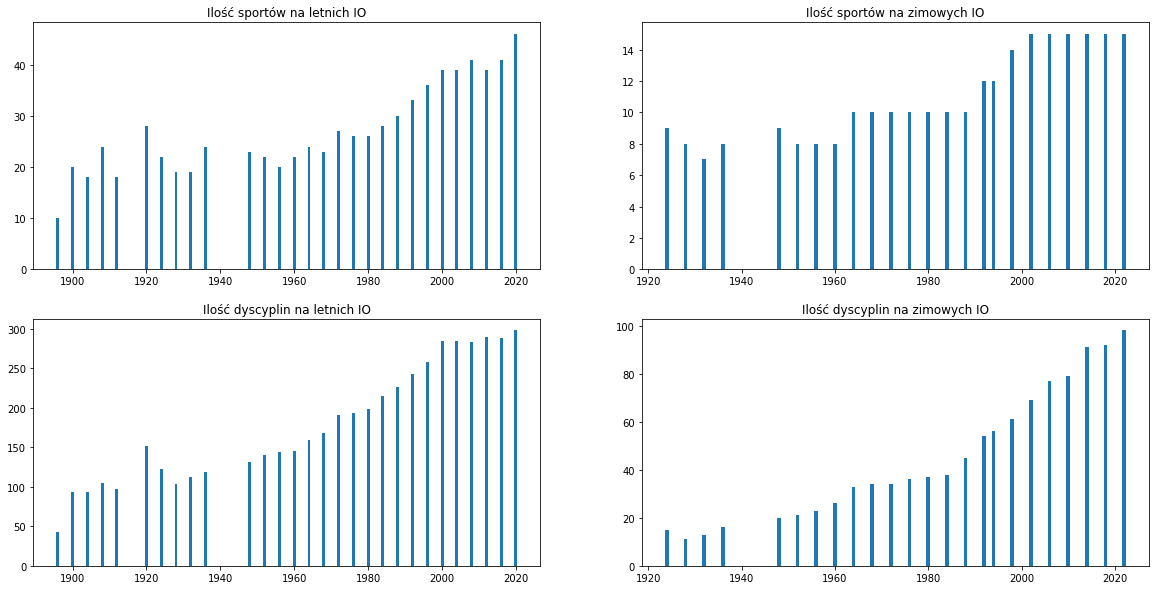

In [3]:
def DFdistinctColumnByYear(inScoresDF, inCol):
	outDict = dict()
	for year in set(inScoresDF['Year']):
		outDict[year] = len(set(inScoresDF[~inScoresDF[inCol]
							.where(inScoresDF['Year'] == year).isnull()][inCol]))

	return pd.DataFrame.from_dict(data=outDict, orient='index', columns=[f'nOf{inCol}s']).sort_index()
	
sSports = DFdistinctColumnByYear(summerScores, 'Sport')
wSports = DFdistinctColumnByYear(winterScores, 'Sport')
sEvents = DFdistinctColumnByYear(summerScores, 'Event')
wEvents = DFdistinctColumnByYear(winterScores, 'Event')


plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.bar(sSports.index, sSports['nOfSports'])
plt.title('Liczba sportów na letnich IO')
plt.subplot(2,2,2)
plt.bar(wSports.index, wSports['nOfSports'])
plt.title('Liczba sportów na zimowych IO')
plt.subplot(2,2,3)
plt.bar(sEvents.index, sEvents['nOfEvents'])
plt.title('Liczba dyscyplin na letnich IO')
plt.subplot(2,2,4)
plt.bar(wEvents.index, wEvents['nOfEvents'])
plt.title('Liczba dyscyplin na zimowych IO')
plt.show()

#### Letnie IO
Różnorodność sportów wzrosła ponad czterokrodnie od pierwszych nowożytnych IO do czasów obecnych. Różnorodność dyscyplin
natomiast zmieniła się niemal sześciokrotnie na przestrzeni ubiegłego wieku. Pozwala to wnioskować, że dla niektórych
sportów pojawiło się więcej nowych bardziej wyspecjalizowanych dyscyplin, lub nowe sporty pozwalały na więszą różnorodność
zawodów. Zmiany te nabrały największego tempa po drugiej wojnie światowej, a w XXI w. - już przystopowały.
#### Zimowe IO
Ilość sportów na zimowych IO była przedziałami stała, tylko w niektórych momentach dodawano nowe sporty. Tych jest również
zdecydowanie mniej niż na letnich edycjach. Ilość dyscyplin rosła nieprzerwanie od początku edycji zimowych.
Zauważamy również, że do 1992 roku IO zimowe i letnie działy się w tym samym roku. Dopiero od 1994r. odbywają się
naprzemiennie co dwa lata.

---
### Złote medale zdobyte przez reprezentacje poszczególnych państw

Złote medale zdobyte przez polskich sportowców:
+ w letnich IO: 72
+ w zimowych IO: 7
+ łącznie: 79


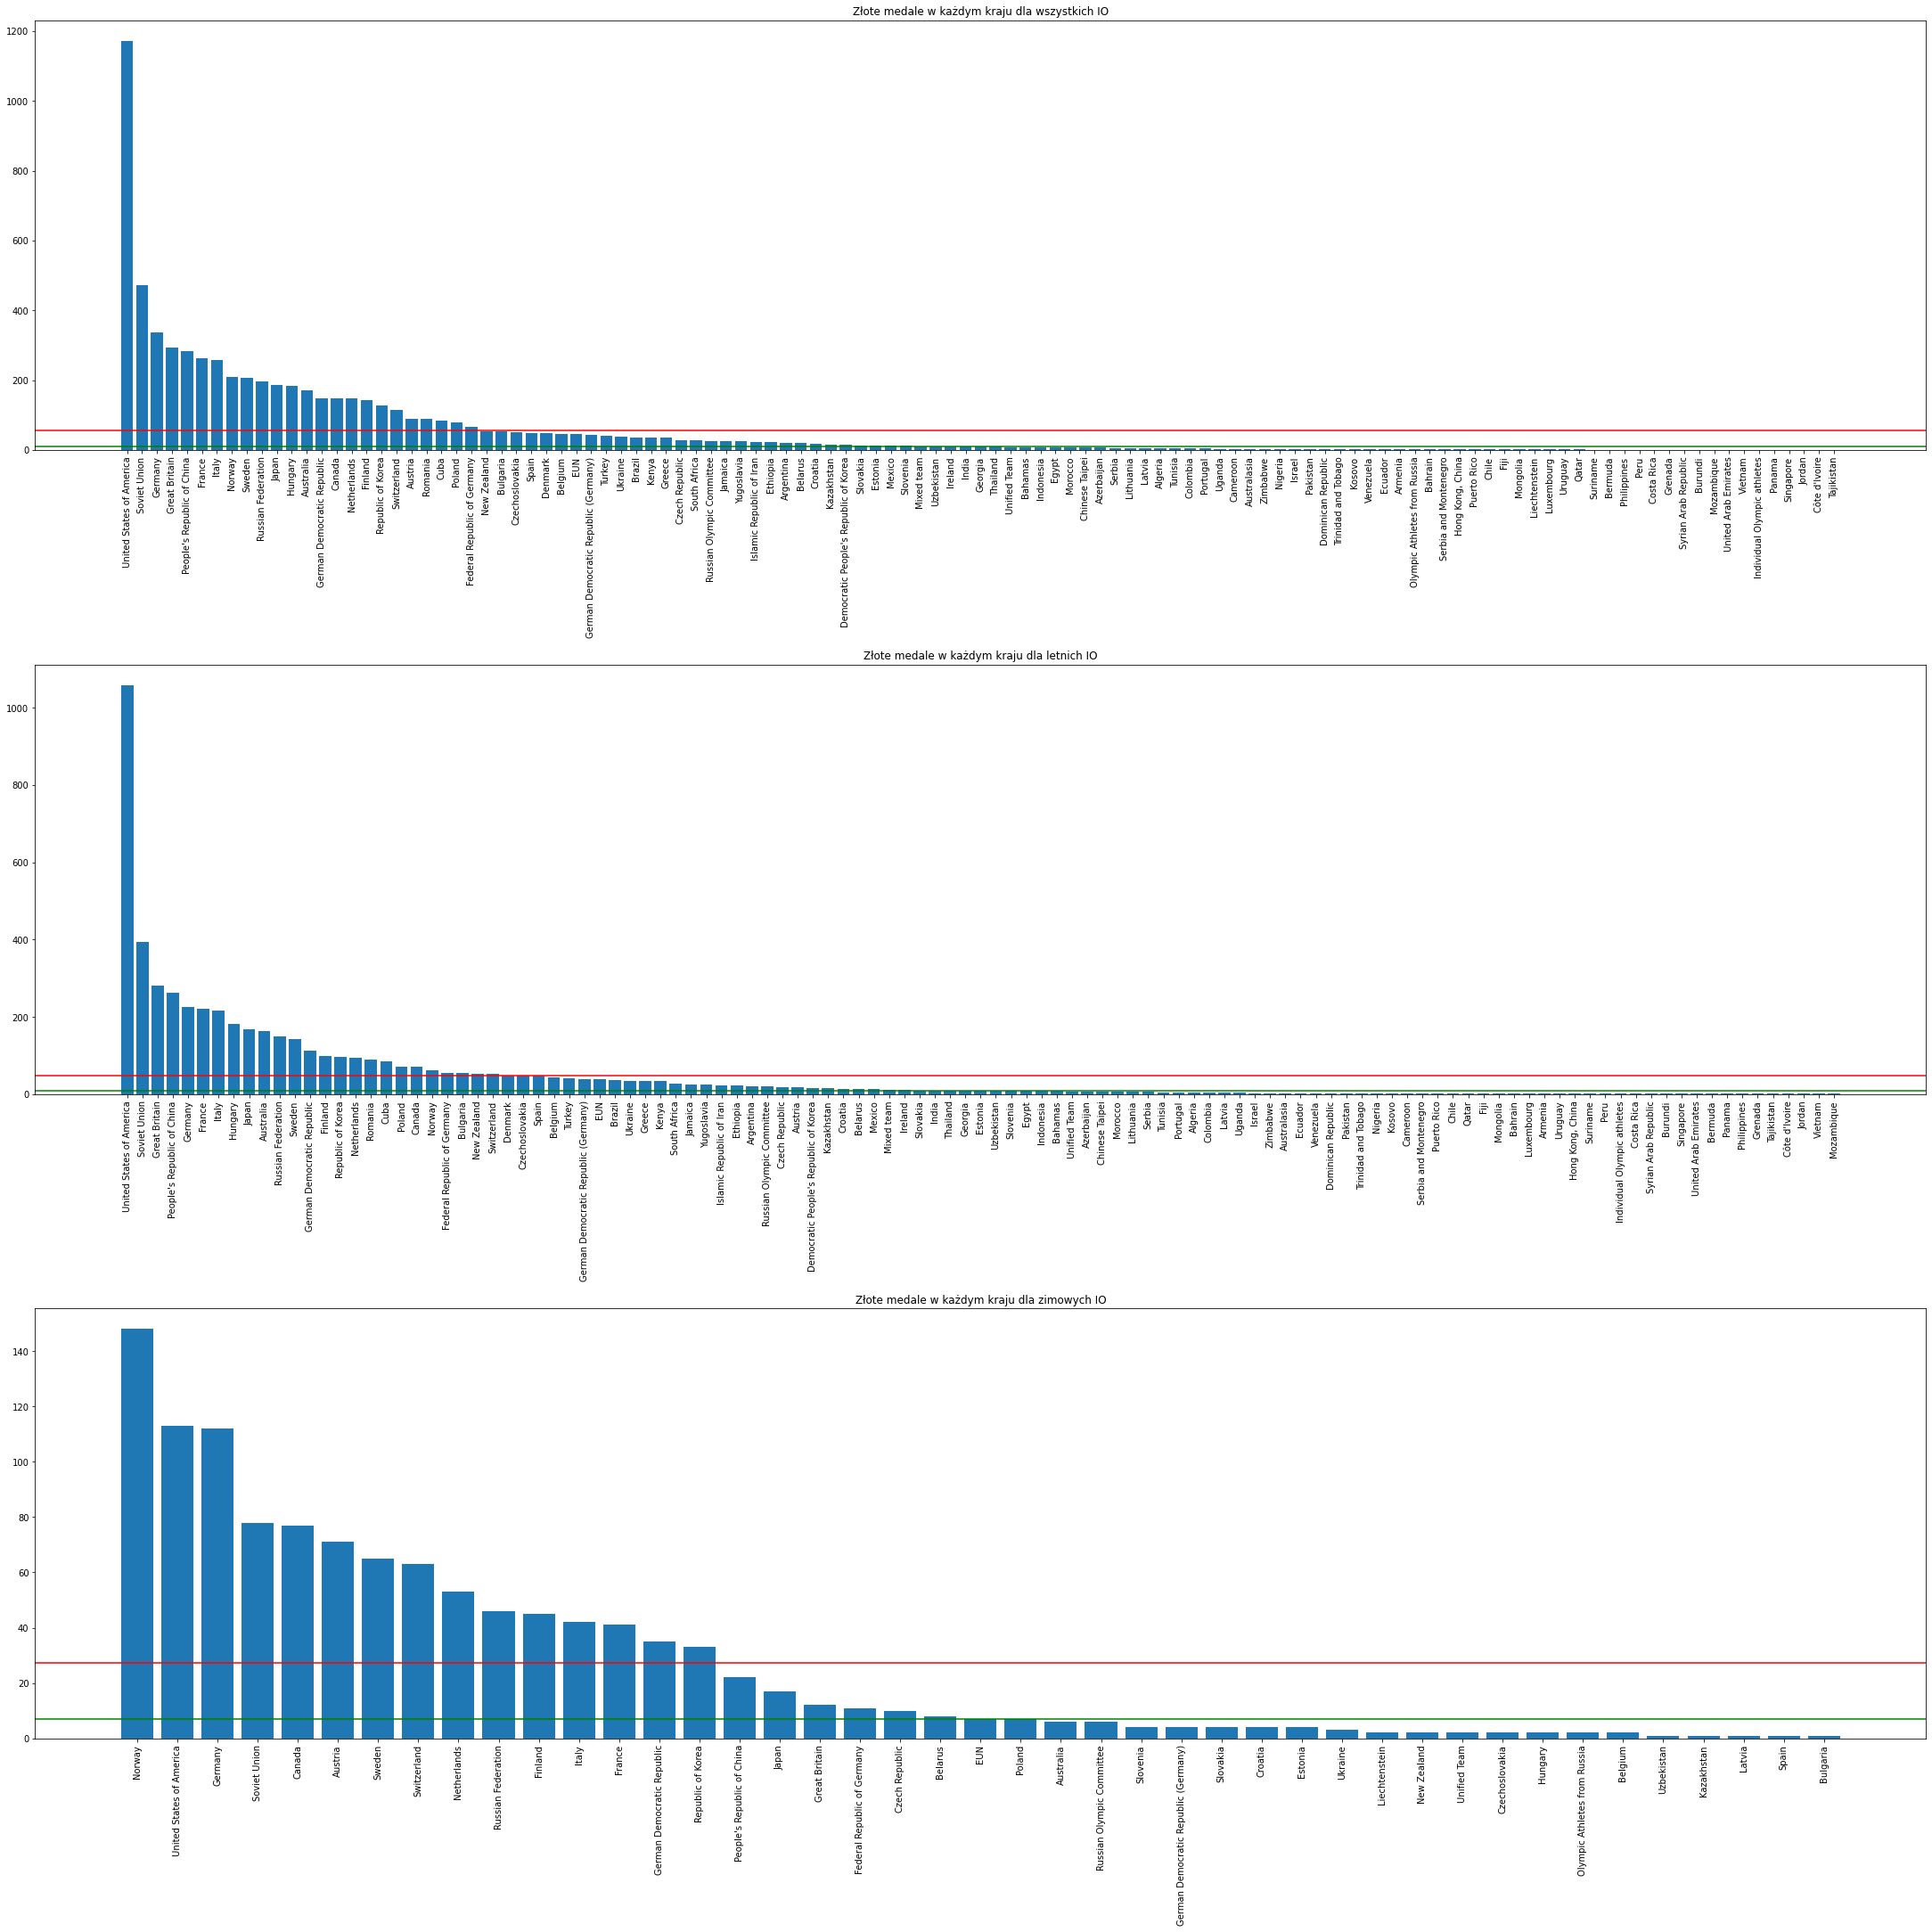

In [4]:
def goldMedalsByCountry(inScoresDF, place):
	return inScoresDF[~inScoresDF.Country.where(inScoresDF.Place == place).isnull()].Country.value_counts()

p = 1
aGoldByCountry = goldMedalsByCountry(allScores, p)
sGoldByCountry = goldMedalsByCountry(summerScores, p)
wGoldByCountry = goldMedalsByCountry(winterScores, p)

print(f'Złote medale zdobyte przez polskich sportowców:\n+ w letnich IO: {sGoldByCountry.Poland}\n+ w zimowych IO: {wGoldByCountry.Poland}\n+ łącznie: {aGoldByCountry.Poland}')

plt.figure(figsize = (30,30), constrained_layout = True)
for i, df in enumerate([aGoldByCountry, sGoldByCountry, wGoldByCountry]):
	plt.subplot(3,1,i+1)
	plt.bar(df.keys(), df.values)
	plt.xticks(rotation=90)
	if i == 0: 	 plt.title('Złote medale w każdym kraju dla wszystkich IO')
	elif i == 1: plt.title('Złote medale w każdym kraju dla letnich IO')
	else: 		 plt.title('Złote medale w każdym kraju dla zimowych IO')
	plt.axhline(y = df.median(), color = 'green', linestyle = '-')
	plt.axhline(y = df.mean(), color = 'red', linestyle = '-')
	# green -> median, red -> mean
plt.show()

* Czerwone linie na wykresach oznaczają średnią ilość złotych medali, a zielona - medianę.
* Jak można odczytać z wykresów polska reprezentacja zdecydowanie przekracza średnią ilość złotych medali w letnich IO,
  natomiast w zimowych nie radzimy sobie już tak dobrze.
* W letnich IO zdecydowane prowadzenie utrzymują Stany Zjednoczone, prawie trzykrotnie przeganiając nieistniejący już 
  Związek Radziecki na drugim miejscu, a czterokrotnie - Wielką Brytanię na trzecim. Jest to jednak również jedno
  z najliczneijszych państw biorących udział w Igrzyskach Olimpijskich.
* W zimowych IO prowadzenie ma Norwegia - czego można się było spodziewać :) Generalnie zestawienie to jest zdominowane
  przez państwa mające lepsze warunki klimatyczne do trenowania sportów zimowych.
* Grecja w żadnym z zestawień nie przekracza średniej - kto mieczem wojuje...

---
### Wszystkie medale zdobyte przez reprezentacje poszczególnych państw

Wszystkie medale zdobyte przez polskich sportowców:
+ w letnich IO: 298
+ w zimowych IO: 23
+ łącznie: 321


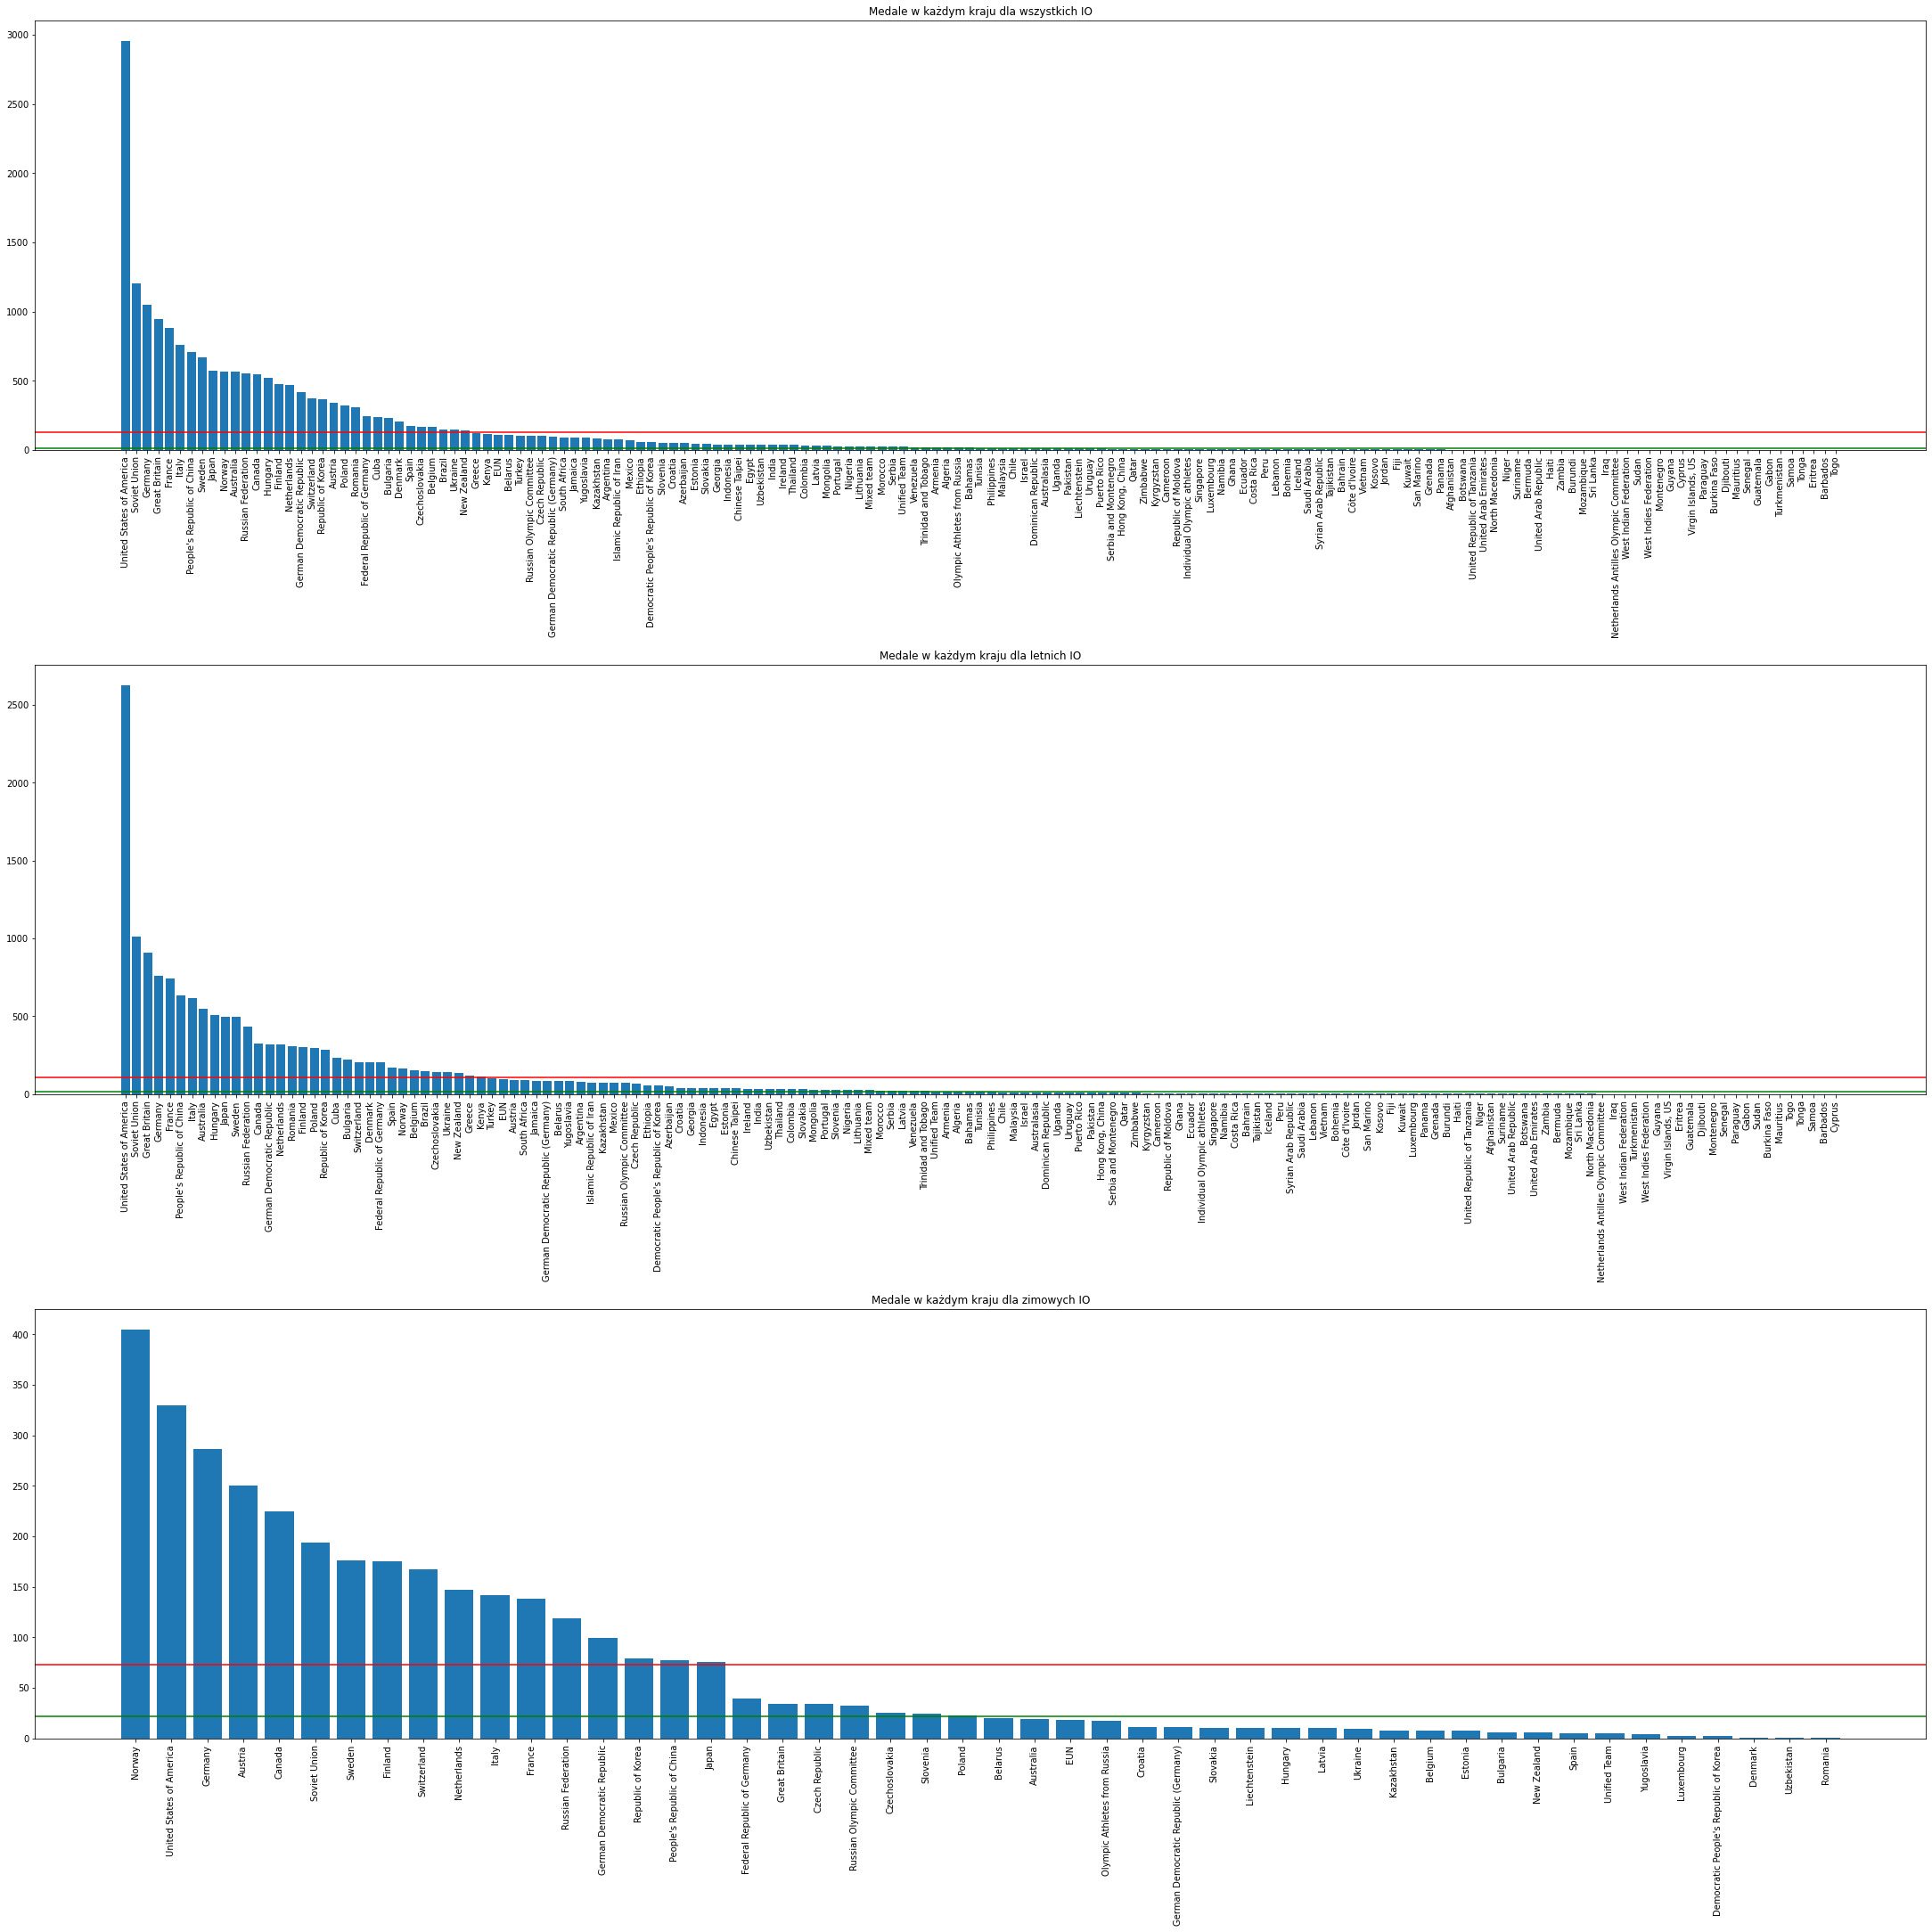

In [5]:
def medalsByCountry(inScoresDF):
	return inScoresDF[~inScoresDF.Country.where((inScoresDF.Place >= 1) & (inScoresDF.Place <= 3)).isnull()].Country.value_counts()

aByCountry = medalsByCountry(allScores)
sByCountry = medalsByCountry(summerScores)
wByCountry = medalsByCountry(winterScores)

print(f'Wszystkie medale zdobyte przez polskich sportowców:\n+ w letnich IO: {sByCountry.Poland}\n+ w zimowych IO: {wByCountry.Poland}\n+ łącznie: {aByCountry.Poland}')

plt.figure(figsize = (30,30), constrained_layout = True)
for i, df in enumerate([aByCountry, sByCountry, wByCountry]):
	plt.subplot(3,1,i+1)
	plt.bar(df.keys(), df.values)
	plt.xticks(rotation=90)
	if i == 0: 	 plt.title('Medale w każdym kraju dla wszystkich IO')
	elif i == 1: plt.title('Medale w każdym kraju dla letnich IO')
	else: 		 plt.title('Medale w każdym kraju dla zimowych IO')
	plt.axhline(y = df.median(), color = 'green', linestyle = '-')
	plt.axhline(y = df.mean(), color = 'red', linestyle = '-')
	# green -> median, red -> mean
plt.show()

Zestwienie wszystkich zdobytych medali, oprócz oczywiście ilości, nie różni się znacząco od poprzedniego, w którym 
brane pod uwagę były jedynie medale złote. Kolejność i proporcje słupków niemalże nie uległy zmianie. W dalszej części 
analizy brane pod uwagę będą wszystkie medale zdobyte przez reprezentacje.

---
### Państwa bez medali olimpijskich
Poniżej znajduje się zestawienie państw biorących udział w Igrzyskach Olimpijskich, których reprezentacjom jeszcze nigdy
nie udało się zdobyć żadnego miejsca na podium. To aż jedna trzecia wszystkich reprezentacji. Sa to jednak drużyny z małych 
lub rozwijających się krajów - za brakiem wyników stoi zapewne brak warunków to rozwoju sportowych talentów.

In [6]:
CountriesWithMedals = dict()
CountriesWithoutMedals = []

allScores.iloc[0,6]

for i in range(allScores.shape[0]):
	if allScores.iloc[i, 5] in [1,2,3]:
		c = allScores.iloc[i, 6]
		CountriesWithMedals[c] = CountriesWithMedals.get(c, 0) + 1

for c in allScores.Country.unique():
	if CountriesWithMedals.get(c, 0) == 0:
		CountriesWithoutMedals.append(c)
CountriesWithoutMedals.sort()

print(f'Wszystkich państw {len(allScores.Country.unique())}')
print(f'Państw bez medali {len(CountriesWithoutMedals)} ({format(len(CountriesWithoutMedals) / len(allScores.Country.unique()) * 100, ".2f")}%)')
print(CountriesWithoutMedals) # print more concise than return value

Wszystkich państw 239
Państw bez medali 82 (34.31%)
['Albania', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Aruba', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brunei Darussalam', 'Cambodia', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Cook Islands', 'Democratic Republic of Timor-Leste', 'Democratic Republic of the Congo', 'Dominica', 'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Federated States of Micronesia', 'Federation of Malaya', 'Gambia', 'Guam', 'Guinea', 'Guinea-Bissau', 'Honduras', 'Independent Olympic Athletes', 'Kiribati', 'Korea Team', "Lao People's Democratic Republic", 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaya', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Monaco', 'Myanmar', 'Nauru', 'Nepal', 'Netherlands Antilles', 'Newfoundland', 'Nicaragua', 'North Borneo', 'Oman', 'Palau', 'Palestine', 'Papua New Guinea', 'Refugee Olympic Te

---
### Nie wystartował, nie ukończył, zdyskwalifikowano
Gdy przeglądałem pobieżnie wyniki zarówno na stronie jak i już te zescrapowane, moją uwagę przykuła ilość zawodników
zgłoszonych do zawodów, którzy nie zdecydowali się wystartować lub z jakiegoś powodu nie ukończyli biegu, w kilku
początkowych edycjach Igrzysk. Przykład ponizej.

In [7]:
allScores.loc[(allScores.Year == 1896) & (allScores.Event == '1200m freestyle men')]

,Host,Year,Type,Sport,Event,Place,Country,Participant,Result
162380,Athens,1896,Summer,Swimming,1200m freestyle men,1.0,Hungary,Alfred Hajos,1102.20
162381,Athens,1896,Summer,Swimming,1200m freestyle men,2.0,Greece,Ioannis Andreou,1263.40
162382,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,United States of America,Gardner Williams,NaN
162383,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Greece,N. Katravas,NaN
162384,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Greece,Efstathios Khorafas,NaN
162385,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Austria,Paul Neumann,Did not finish
162386,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Denmark,Holger Nielsen,Did not start
162387,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Denmark,Charles Winckler,Did not start
162388,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,France,Alphonse Grisel,Did not start
162389,Athens,1896,Summer,Swimming,1200m freestyle men,NaN,Greece,D. Frangopoulos,Did not start


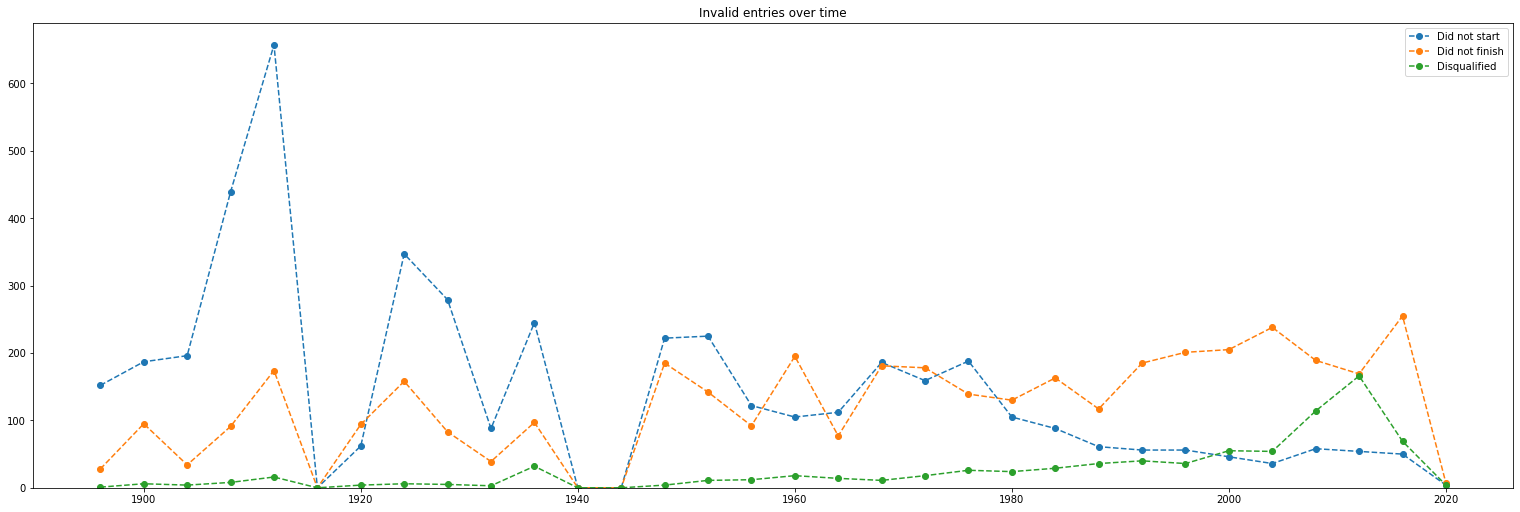

In [8]:
baseDF = summerScores # dla allScores po 1992 letnie i zimowe IO odbywaly sie naprzemiennie
dns = baseDF[~baseDF.where(baseDF.Result == 'Did not start').isnull()].Year.value_counts()
dnf = baseDF[~baseDF.where(baseDF.Result == 'Did not finish').isnull()].Year.value_counts()
dis = baseDF[~baseDF.where(baseDF.Result == 'Disqualified').isnull()].Year.value_counts()
nonexistent = pd.Series([0,0,0], index=[1916,1940,1944]) # bez tego wykres nie zerowalby sie w tych punktach

plt.figure(figsize = (21,7), constrained_layout = True)
plt.title('Invalid entries over time')

for df in [dns, dnf, dis]:
	df = pd.concat([df, nonexistent])		# adding values for non-existent games
	df = df.sort_index()					# sorting by index (year); sorted by value by default
	plt.plot(df.index, df.values, marker='o', linestyle='--')	# adding onto one plot

plt.legend(['Did not start', 'Did not finish', 'Disqualified'])
plt.ylim(ymin=0)
plt.show()

**Uwaga!** Wykres sporządzony dla danych z letnich IO - ze względu na zmienę w czasie organizacji IO wykres nie oddawał
prawidłowego stanu rzeczy (letnie i zimowe IO zaczęły odbywać się naprzemiennie - punkty przybierały na oko dwa razy mniejsze
wartości, będąc rozmieszczonymi dwa razy częściej).     
  
Faktycznie na początku ilość zawodników nieprzystępujących do zawodów była zdecydowanie wyższa niż obecnie. Od lat 70.
ubiegłego wieku obserwujemy jednak szybką tendencję spadkową. Za razem wzrosła ilość zawodników niebędących w stanie 
ukończyć zawodów. Czyżby sportowcy zaczęli w tym okresie masowo przeceniać swoje możliwości?  
  
W trakcie londyńskich letnich Igrzysk Olimpijskich doszło do masowej dyskwalifikacji rekordowej liczby zawodników. 
Temu zjawisku przyjrzymy się w następnej sekcji.

---
### Wpływ dopingu na wyniki sportowe
Powyższa afera dopingowa i zarzuty programu dopingowego sponsorowanego przez państwo [[1]](https://en.wikipedia.org/wiki/Doping_in_Russia) doprowadziły do zakazu występu reprezentacji Rosji na IO do końca 2022. Rosyjscy zawodnicy, u których
nie wykryto substancji wspomagających zostali dopuszczeni do udziału w Igrzyskach, natomiast nie w barwach narodowych, a
jako *Olimpijscy sportowcy z Rosji* w Pjongjangu oraz *Rosyjski Komitet Olimpijski* w Tokio i Pekinie.


In [9]:
byear = 1994 # wspolczesna Rosja 1994-2016
wszyscyPrzed = allScores.loc[allScores.Country == 'Russian Federation'].loc[allScores.Year >= byear].shape[0]
wszyscyPo = allScores.loc[allScores.Country == 'Olympic Athletes from Russia'].shape[0]
wszyscyPo += allScores.loc[allScores.Country == 'Russian Olympic Committee'].shape[0]

medalisciPrzed = allScores.loc[allScores.Country == 'Russian Federation'].loc[(allScores.Place >= 1) & (allScores.Place <= 3)].loc[allScores.Year >= byear].shape[0]
medalisciPo = allScores.loc[allScores.Country == 'Olympic Athletes from Russia'].loc[(allScores.Place >= 1) & (allScores.Place <= 3)].shape[0]
medalisciPo += allScores.loc[allScores.Country == 'Russian Olympic Committee'].loc[(allScores.Place >= 1) & (allScores.Place <= 3)].shape[0]

print(f'Przed wykluczeniem Rosji z udziału w IO (od {byear}): {medalisciPrzed} medalistów na {wszyscyPrzed} uczestników - {format(medalisciPrzed / wszyscyPrzed * 100, ".2f")}%')
print(f'Po wykluczeniu Rosji z udziału w IO: {medalisciPo} medalistów na {wszyscyPo} uczestników - {format(medalisciPo / wszyscyPo * 100, ".2f")}%')

Przed wykluczeniem Rosji z udziału w IO (od 1994): 545 medalistów na 2917 uczestników - 18.68%
Po wykluczeniu Rosji z udziału w IO: 120 medalistów na 666 uczestników - 18.02%


Skuteczność zawodników uległa jedynie minimalnemu, niemal nieznaczącemu, pogorszeniu. Jedna rzecz w takim razie okazuje
się nieskuteczna - doping lub restrykcje.

---
### Rozpad ZSRR a wyniki sportowe, cz. 1
W tej sekcji sprawdzono wpływ rozpadu ZSRR na sumaryczne wyniki wszystkich państw członkowskich.  
Dodatkowe dane potrzebne do analizy:
* lista państw, które ogłosiły niepodległość po rozpadzie ZSRR [[2]](https://en.wikipedia.org/wiki/Dissolution_of_the_Soviet_Union#Chronology_of_declarations)
* populacja państw członkowskich w trakcie rozpadu [[3]](https://en.wikipedia.org/wiki/Demographics_of_the_Soviet_Union#Ethnic_groups) (druga tabelka w tej sekcji artykułu)
  
Jako punkt odniesienia wybrano rok 1989, ponieważ:
* 1988 to ostanie Igrzyska w których uczestniczył ZSRR
* do następnych IO w 1992 wszystkie państwa już zdążyły się odłączyć od Związku Radzieckiego [[2]](https://en.wikipedia.org/wiki/Dissolution_of_the_Soviet_Union#Chronology_of_declarations)

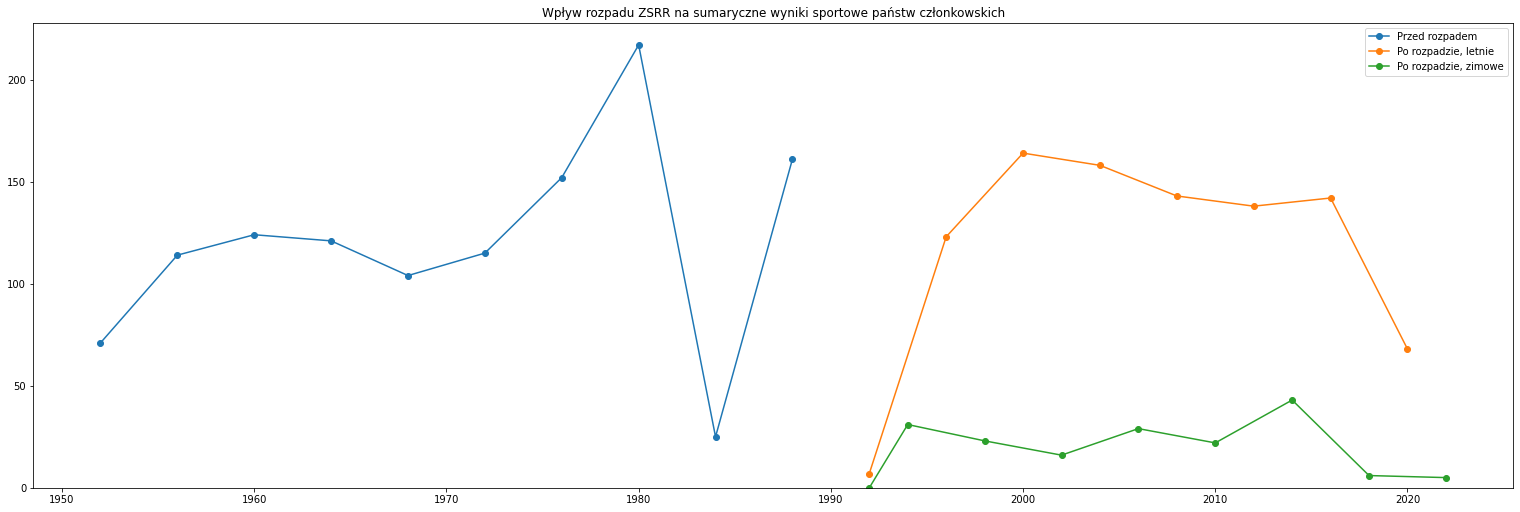

In [10]:
# populacja poszczegolnych panstw czlonkowskich ZSSR
USSRpopulation = 286.717 # w milionach, stan na rok 1989 (1988 to ostatnie IO w ktorych ZSRR bralo udzial)
formerUSSRpops = {	'Russian Federation': 147.386, 'Ukraine': 51.704, 'Belarus': 10.200,
					'Republic of Moldova': 4.341, 'Azerbaijan': 7.029, 'Georgia': 5.449,
					'Armenia': 3.283, 'Uzbekistan': 19.906, 'Kazakhstan': 16.538,
					'Tajikistan': 5.112, 'Kyrgyzstan': 4.291, 'Turkmenistan': 3.534,
					'Lithuania': 3.690, 'Latvia': 2.681, 'Estonia': 1.573  }

# sprawdzam, czy rozpad ZSRR wplynal na sume medali zdobywanych przez panstwa czlonkowskie
# ilosc medali zdobywanych przez ZSRR na kazdych IO przez rozpadem 
USSRmedalsByYear = allScores.loc[allScores.Country == 'Soviet Union'].loc[(allScores.Place >= 1) & (allScores.Place <= 3)].Year.value_counts().sort_index()

# ilosc medali zdobytych sumarycznie przez panstwa czlonkowskie na kazdych IO po rozpadzie
# dodatkowo od 1992 jest 2-letni offset miedzy letnimi a zimowymi igrzyskami, stad podzial na typ 
def createSeriesMedalsByYearByType(t):
	# create Series with proper year indexing including type (didn't want to type it by hand and overcomplicated a bit, i know)
	gamesAfterDissolution = allScores.loc[allScores.Year > 1988].loc[allScores.Type == t].Year.value_counts().sort_index().index
	# create series based on said indexing
	NEWmedalsByYear = pd.Series([0] * len(gamesAfterDissolution), index=gamesAfterDissolution)

	for c in list(formerUSSRpops.keys()):
		for y in list(gamesAfterDissolution):
			nOfMedByCandY = (allScores.loc[allScores.Country == c]								# where specified country
							.loc[allScores.Year == y]											# where past 1988
							.loc[allScores.Type == t]											# summer / winter
							.loc[(allScores.Place >= 1) & (allScores.Place <= 3)].shape[0])		# where 1st trough 3rd place, shape[0] == count of rows
			NEWmedalsByYear[y] += nOfMedByCandY
	return NEWmedalsByYear

NEWmedalsByYearSummer = createSeriesMedalsByYearByType('Summer')
NEWmedalsByYearWinter = createSeriesMedalsByYearByType('Winter')

# wykres sumy medali przed i po rozpadzie w czasie
plt.figure(figsize = (21,7), constrained_layout = True)
plt.plot(USSRmedalsByYear.index, USSRmedalsByYear.values, marker='o')
plt.plot(NEWmedalsByYearSummer.index, NEWmedalsByYearSummer.values, marker='o')
plt.plot(NEWmedalsByYearWinter.index, NEWmedalsByYearWinter.values, marker='o')
plt.ylim(ymin=0)
plt.legend(['Przed rozpadem', 'Po rozpadzie, letnie', 'Po rozpadzie, zimowe'])
plt.title('Wpływ rozpadu ZSRR na sumaryczne wyniki sportowe państw członkowskich')
plt.show()

# jak widać, pozytywny
# po 2016 widac jednak spadek bo w dany wykres nie sa wlaczone wyniki ROC oraz OAfR, juz mi sie nie chcialo

Jak widać już w 1994 państwa członkowskie były gotowe wystartować w Igrzyskach Olimpijskich. Okazuje się, że rozpad
Związku Radzieckiego wyszedł sportowcom na dobre - sama ilość medali w edycjach letnich po rozwiązaniu jest średnio
wyższa od tej przed rozpadem, tym bardziej więc po ewentualnym zsumowaniu tego z edycjami zimowymi. Jest on jednak mniej
więcej stały w czasie. Spadek po roku 2016 jest spowodowany zapewnie tym, że na wykresie nie zostały uwzględnione zespoły
powstałe po aferze dopingowej i zakazie udziału rosyjskiej reprezentacji. Rosja nadal mimo wszystko odgrywa znaczną rolę
w tej statystyce, przez zdecydowanie wyższą populację od innych państw członkowskich.

---
### Rozpad ZSRR a wyniki sportowe, cz. 2
Poniżej sprawdzono, czy istnieje związek między częścią populacji ZSRR jaki stanowiło dane państwo członkowskie, a
jego wkładem w wyniki sportowe Związku Radzieckiego. Korzystamy z obserwacji, że wyniki państw członkowskich po rozpadzie
są mniej więcej stałe w czasie, wniskując że wyniki poszczególnych państw również nie wykazują zmienności od czasu.

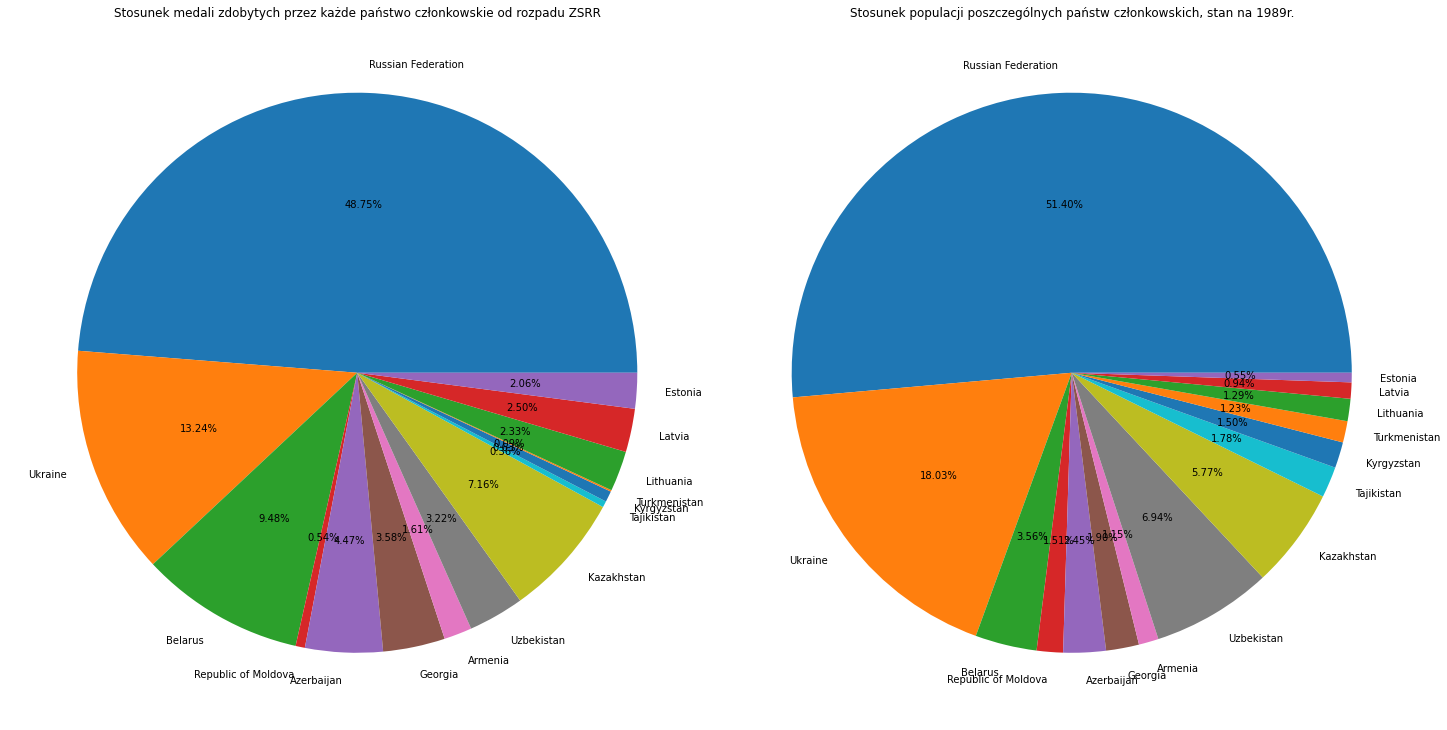

In [11]:
medalsByPostUSSRCountry = pd.Series([0] * len(formerUSSRpops.keys()), index=formerUSSRpops.keys())

for c in formerUSSRpops.keys():
	nOfmed = (allScores.loc[allScores.Country == c]								# dla danego kraju
					   .loc[(allScores.Place >= 1) & (allScores.Place <= 3)]	# medalisci
					   .loc[allScores.Year > 1988]								# po rozpadzie ZSRR
					   .shape[0])												# ilosc wierszy
	medalsByPostUSSRCountry[c] = nOfmed

plt.figure(figsize = (20,10), constrained_layout = True, facecolor='white')
plt.subplot(1,2,1)
plt.pie(medalsByPostUSSRCountry, labels=medalsByPostUSSRCountry.index, autopct='%1.2f%%')
plt.title('Stosunek medali zdobytych przez każde państwo członkowskie od rozpadu ZSRR')
plt.subplot(1,2,2)
plt.pie(list(formerUSSRpops.values()), labels=list(formerUSSRpops.keys()), autopct='%1.2f%%')
plt.title('Stosunek populacji poszczególnych państw członkowskich, stan na 1989r.')
plt.show()

Białoruś i Azerbejdżan to na pierwszy rzut jedyne państwa, które (najprawdopodobniej) miały proporcjonalnie większy wkład
w sportowe sukcesy ZSRR, niż wskazywałby na to ich udział w populacji.   
Zmiany między obydwoma powyższymi wykresami są jednak na tyle nieznaczne, że ciężko stwierdzić czy taki jest faktyczny
stan rzeczy, czy przyjęto za dużo uproszczeń analizując ten aspekt danych. W związku z tym wnioskuje się, że 
wkład poszczególnych państw członkowskich w wyniki olimpijskie Związku Radzieckiego są (mniej więcej) proporcjonalne 
do ich populacji.